correlation [-0.6971312958682353] 2.3059945459797167e-14
mean,std = (90951.51111111112, 108846.96496205062)
t = 1.9869786993737677
df = 89
confidence of 95% (68153.95566605241, 113749.06655616983)
[[ -2920.82694983]
 [220928.31037851]]


/var/folders/p1/vychbyg51cs0s16tvzh88pk00000gn/T/ipykernel_78027/1117267329.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['index']=cmp


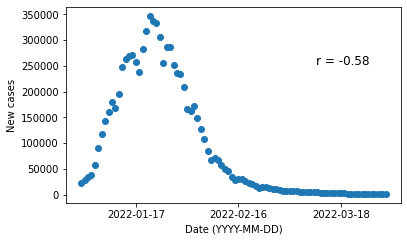

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr,t
from sklearn import preprocessing

df = pd.read_csv('covid_data.csv')

cases=df[["Date_reported","Country","New_cases"]]

cases=cases.loc[cases['Country']== 'India']

date=cases.loc[(cases['Date_reported'] >= '2022-01-01')& (cases['Date_reported'] < '2022-04-01')]


cmp=range(0,90)
cmp1=range(0,468)
date['index']=cmp

X1= date.iloc[:,3].values.reshape(-1,1)
X= date.iloc[:,0]
Y= date.iloc[:,2].values.reshape(-1,1)

x=X1.flatten()


current_figure = plt.gcf()
current_figure.autofmt_xdate()
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X1)

cor,corp= scipy.stats.pearsonr(x, Y)
print('correlation',cor,corp)
m = Y.mean() 
s = Y.std()
print("mean,std =",(m,s)) 
df = len(Y)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,df))
print("t =",t_crit)
print("df =",df)
print("confidence of 95%",(m-(s*t_crit/np.sqrt(len(x))), m+(s*t_crit/np.sqrt(len(x)))))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.scatter(X,Y)
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("New cases")
plt.annotate(r'r = -0.58',
             xy=(89,Y_pred[9]), 
             xycoords='data',
             xytext=(-70,30),
             textcoords='offset points',
             fontsize=12,  
             
            )
slope_intercept = np.polyfit(x,Y_pred,1)
print(slope_intercept)
plt.show()

